Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06.ipynb)

# Exercise 6

## Problem

In class this week, we saw how to access real-time data about Capital Bikeshare from the internet using their API. We also dealt with the challenge of wrangling those data. We needed to parse a JSON file into a table, and we considered how we might retrieve, store, and combine many JSONs in order to understand how bike availability changed over time.

These real-time data can help us answer questions about how well Captial Bikeshare is being utilized.

See if you can use data from the API (I have already stored and combined it--see below) answer these questions:
- How many bikes were available within the system during each hour over a 24 hour period?
    - Can you graph this over time?
    - Which hour of the day were bikes most available? Least available?

**Bonus:** Can you write a function to estimate how many bikes are <ins>currently being used</ins>, whenever you call the function? This will require loading real-time data from the API and comparing it to stored data.

## Data

I wrote a script, which you can see [here](https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo06/cabi_data/get_cabi_free_bikes.py), to retrieve and store JSON data from the `free_bike_status` table in [Capital Bikeshare's](https://capitalbikeshare.com/system-data) GBFS feed every 5 minutes. I ran this script on my computer for a bit more than 24 hours. ([Here's a tutorial](https://realpython.com/run-python-scripts/) on running scripts on the command line, if you're curious.) All of those JSONS are available for you to use. They're stored at [`ursp688y_sp2024/demos/demo06/cabi_data`](https://github.com/ncsg/ursp688y_sp2024/tree/main/demos/demo06/cabi_data).

## Building Off of the Demo

The in-class demo gave us a starting point for how to access real-time JSON data from the API, load saved JSON data, and parse JSON data into a DataFrame.

I have copied what we did in class below and added onto it to develop a single tidy dataframe with records from all the saved JSONs, plus timestamps. This should be all the data you need for the questions above (except the bonus).

See if you can follow my code, then build onto it.

As usual, please wrap the code for your solution in a function, and put that function into a module (you can add to my module, or make a new one if you prefer). Then load your main function from the module and call it in the notebook to demonstrate your solution.


# Setup

In [3]:
# Import packages
import os
import json
import requests
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/Spring_24_UMD_Courses/URSP 688Y/exercise06_alam')

In [4]:
# Import module
import exercise06

# Request current data from the API

In [6]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
data = response.json()

# Inspect the contents
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [7]:
# Make a dataframe out of data for available bikes
df = pd.DataFrame(data['data']['bikes'])

df.head()

,name,rental_uris,is_reserved,is_disabled,bike_id,lon,fusion_lon,type,fusion_lat,lat
0,222-581,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,a0aa065f6fd74e7978b513d8cdd64cf1,-76.998734,0.0,electric_bike,0.0,38.918871
1,201-455,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,1be60cbace8b7fb6f5113f3689d45679,-77.147770,0.0,electric_bike,0.0,38.863750
2,564-686,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,fb19f8b9cd0eb6c7c5c2019b2effe94d,-77.021102,0.0,electric_bike,0.0,38.946343
3,623-376,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,6727235431abec1be31966c49da709d3,-77.010493,0.0,electric_bike,0.0,38.877642
4,170-725,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,4a92753094db860b7f4296bb05a557c9,-77.025984,0.0,electric_bike,0.0,38.899934


# Load JSON data saved in a file

In [8]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-03_13-11-54.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    data = json.load(json_data)
    json_data.close()

In [9]:
# see how the data are stored
type(data)

dict

In [10]:
# see what keys are available
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [11]:
# drill into the records for each bike
records = data['data']['bikes']

# convert to a dataframe
df = pd.DataFrame(records)

# drop a column that we won't use, just to keep things clean
df = df.drop(columns=['rental_uris'])

In [12]:
df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon
0,0,0.0,0.0,38.887458,electric_bike,0,d94788433d337e4186fb431076b52e91,320-065,-77.025747
1,0,0.0,0.0,38.905328,electric_bike,0,cc49246f85fdc23a6a13b3402ab52b37,222-581,-77.058526
2,0,0.0,0.0,38.908954,electric_bike,0,75c5df17a8236707a7948f509a5ab929,228-812,-77.043055
3,0,0.0,0.0,38.955421,electric_bike,0,4e51a79c1e03962064762ff16013b1a8,570-760,-76.940135
4,0,0.0,0.0,38.892292,electric_bike,0,5983a1b66f086f7905d8aa701fa7b5df,268-224,-77.042912


# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [5]:
df = exercise06.load_and_combine_free_bike_status_jsons_as_df('../cabi_data')

df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon,timestamp
0,0,0.0,0.0,38.887418,electric_bike,0,2c7c429ad215f54b34c470bb0d7ab2d0,320-065,-77.025741,2024-03-03 21:42:20-05:00
1,0,0.0,0.0,38.955444,electric_bike,0,b76b3c95bf337250f1812d044d496150,570-760,-76.940146,2024-03-03 21:42:20-05:00
2,0,0.0,0.0,38.881450,electric_bike,0,6a1764663f81aeb992d2a3eb03ab8cae,268-224,-77.027402,2024-03-03 21:42:20-05:00
3,0,0.0,0.0,38.907814,electric_bike,0,8dc155e7028366a10f173f10ba4a8c42,137-726,-77.071612,2024-03-03 21:42:20-05:00
4,0,0.0,0.0,38.898261,electric_bike,0,6f3a3f154abfb168b4609b2ba8138894,329-768,-77.046883,2024-03-03 21:42:20-05:00


This is where you take over. Can you use this dataframe to answer the question(s) above?

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Extract hour and date from timestamp and create a new column for the hour
df['Hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['date'] = df['timestamp'].dt.date

In [8]:
# Group by hour and count the number of unique bikes available for each hour
hourly_summary = df.groupby(['date', 'Hour'])['bike_id'].nunique()

In [9]:
print(hourly_summary)

date        Hour
2024-03-03  15      1964
            16      2044
            17      2063
            18      2028
            19      2006
            20      2023
            21      2014
            22      2051
            23      2041
2024-03-04  0       2060
            1       2058
            2       2055
            3       2064
            4       2050
            5       2037
            6       2039
            7       2032
            8       2051
            9       2041
            10      2033
            11      2001
            12      2045
            13      2041
            14      2089
            15      2106
            16      2127
            17      2113
Name: bike_id, dtype: int64


In [10]:
# Specify the target date and hour
target_date = '2024-03-04'
target_hour = 16

# Create a timestamp for the target date and hour
target_timestamp = pd.Timestamp(f'{target_date} {target_hour}:00:00')

# Localize the target timestamp to the same time zone as the DataFrame's timestamps
target_timestamp = target_timestamp.tz_localize(df['timestamp'].dt.tz)

# Calculate the timestamp for 24 hours before the target timestamp
start_timestamp = target_timestamp - pd.Timedelta(hours=24)

# Filter the DataFrame to include data within the 24-hour window from the target timestamp
filtered_df = df[(df['timestamp'] >= start_timestamp) & (df['timestamp'] < target_timestamp)]


In [11]:
# Group by hour and count the number of unique bikes available for each hour
hourly_summary = filtered_df.groupby('Hour')['bike_id'].nunique()

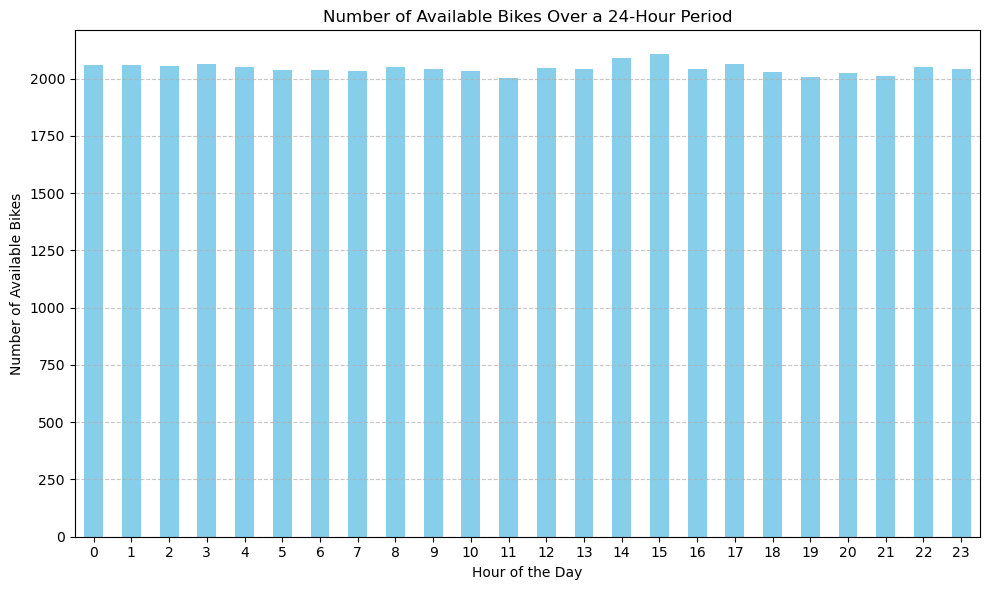

In [12]:
# Plot the trend over the 24-hour period
plt.figure(figsize=(10, 6))
hourly_summary.plot(kind='bar', color='skyblue')
plt.title('Number of Available Bikes Over a 24-Hour Period')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Available Bikes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Find the hour with the most available bikes
most_available_hour = hourly_summary.idxmax()
most_available_bikes = hourly_summary.max()

# Find the hour with the least available bikes
least_available_hour = hourly_summary.idxmin()
least_available_bikes = hourly_summary.min()

print(f"The hour with the most available bikes is {most_available_hour} with {most_available_bikes} bikes available.")
print(f"The hour with the least available bikes is {least_available_hour} with {least_available_bikes} bikes available.")

The hour with the most available bikes is 15 with 2106 bikes available.
The hour with the least available bikes is 11 with 2001 bikes available.


In [15]:
import requests
import json
from datetime import datetime, timedelta

def estimate_current_usage(api_url, stored_json_path):
    try:
        # Retrieve real-time data from the API
        response = requests.get(api_url)
        real_time_data = response.json()

        # Extract bike data from real-time data
        real_time_bikes = real_time_data.get('data', {}).get('en', {}).get('feeds', [])

        # Load stored JSON data
        with open(stored_json_path, 'r') as file:
            stored_json_data = json.load(file)

        # Extract bike IDs from stored JSON data
        stored_bikes = stored_json_data.get('data', {}).get('bikes', [])

        # Get the current time
        current_time = datetime.now()

        # Initialize a dictionary to store bike name counts
        bike_name_counts = {}

        # Iterate over the bikes used in the last 5 minutes
        for bike in real_time_bikes:
            timestamp = bike.get('timestamp', 0)
            # Check if the bike was used in the last 5 minutes
            if (current_time - datetime.fromtimestamp(timestamp)).total_seconds() <= 300:
                bike_name = bike['name']
                # Increment the count for the bike name
                bike_name_counts[bike_name] = bike_name_counts.get(bike_name, 0) + 1

        # Calculate the total count of bikes used in the last 5 minutes
        total_bikes_in_use = sum(bike_name_counts.values())

        return total_bikes_in_use

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
api_url = 'https://gbfs.capitalbikeshare.com/gbfs/2.3/gbfs.json'
stored_json_path = '../cabi_data/cabi_bike_status_2024-03-03_13-11-54.json'
current_usage = estimate_current_usage(api_url, stored_json_path)
if current_usage is not None:
    print(f"Estimated number of bikes currently in use in the last 5 minutes: {current_usage}")
else:
    print("Failed to estimate current usage.")


Estimated number of bikes currently in use in the last 5 minutes: 0
